# 🚕 NYC Taxi Trip Duration - Data Exploration
## MLOps Pipeline con Arquitectura Hexagonal + DDD

Este notebook es parte de la **FASE 1** del proyecto MLOps completo que incluye:
- ✅ Exploración del dataset
- 🏗️ Arquitectura hexagonal simple
- 🎯 Domain Driven Design (DDD)
- 🐳 Docker para deployment
- ☁️ AWS PostgreSQL
- 📊 MLflow para tracking
- 🚀 FastAPI para predicciones
- 📈 Streamlit para monitoring

---

## 📋 **Objetivos de esta exploración:**
1. **Entender la estructura del dataset**
2. **Identificar features importantes**
3. **Detectar problemas de calidad de datos**
4. **Definir el dominio del negocio** (para DDD)
5. **Planear feature engineering**

In [1]:
# 📦 Setup e Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("🚀 Setup completado!")
print(f"📅 Fecha de exploración: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

🚀 Setup completado!
📅 Fecha de exploración: 2025-07-19 09:17:09


## 📊 **Paso 1: Carga y Primera Vista del Dataset**

In [2]:
# 🔍 Carga del dataset (muestra pequeña para empezar)
try:
    # Intentamos cargar solo las primeras 10,000 filas para exploración rápida
    df_sample = pd.read_csv('train.csv', nrows=10000)
    print(f"✅ Dataset cargado exitosamente!")
    print(f"📏 Tamaño de la muestra: {df_sample.shape}")
    print(f"💾 Memoria utilizada: {df_sample.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
except Exception as e:
    print(f"❌ Error cargando dataset: {e}")
    df_sample = None

✅ Dataset cargado exitosamente!
📏 Tamaño de la muestra: (10000, 11)
💾 Memoria utilizada: 3.17 MB


In [3]:
# 👀 Primera vista de los datos
if df_sample is not None:
    print("🔍 **PRIMERAS 5 FILAS:**")
    display(df_sample.head())

    print("\n📋 **INFORMACIÓN GENERAL:**")
    print(df_sample.info())

    print("\n📊 **ESTADÍSTICAS DESCRIPTIVAS:**")
    display(df_sample.describe())

🔍 **PRIMERAS 5 FILAS:**


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435



📋 **INFORMACIÓN GENERAL:**
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  10000 non-null  object 
 1   vendor_id           10000 non-null  int64  
 2   pickup_datetime     10000 non-null  object 
 3   dropoff_datetime    10000 non-null  object 
 4   passenger_count     10000 non-null  int64  
 5   pickup_longitude    10000 non-null  float64
 6   pickup_latitude     10000 non-null  float64
 7   dropoff_longitude   10000 non-null  float64
 8   dropoff_latitude    10000 non-null  float64
 9   store_and_fwd_flag  10000 non-null  object 
 10  trip_duration       10000 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 859.5+ KB
None

📊 **ESTADÍSTICAS DESCRIPTIVAS:**


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.530300,1.669700,-73.973190,40.751030,-73.973164,40.751771,920.205900
std,0.499106,1.318702,0.038532,0.027962,0.036515,0.032430,2873.617443
min,1.000000,1.000000,-74.209854,40.612793,-74.379631,40.567341,2.000000
25%,1.000000,1.000000,-73.991777,40.737593,-73.991333,40.735152,395.000000
50%,2.000000,1.000000,-73.981865,40.754478,-73.979565,40.754427,658.000000
75%,2.000000,2.000000,-73.966635,40.768284,-73.962477,40.770117,1064.000000
max,2.000000,6.000000,-73.756172,40.874420,-73.593582,41.043865,86357.000000


## 🎯 **Paso 2: Análisis del Dominio del Negocio (DDD)**

Basándose en los datos, vamos a identificar las **entidades del dominio**:

### 🏗️ **Entidades Principales (Domain Entities):**
1. **`TaxiTrip`** - Viaje principal
2. **`Location`** - Ubicación (pickup/dropoff)
3. **`TripDuration`** - Duración del viaje (value object)
4. **`Prediction`** - Predicción del modelo

### 🔌 **Puertos (Interfaces):**
1. **`TripRepository`** - Acceso a datos
2. **`PredictionService`** - Servicio de ML
3. **`LocationService`** - Cálculos geográficos

### 🔧 **Adaptadores:**
1. **`PostgreSQLAdapter`** - Base de datos
2. **`MLflowAdapter`** - Machine Learning
3. **`FastAPIAdapter`** - API REST

In [4]:
# 🗺️ Análisis de ubicaciones (coordenadas)
if df_sample is not None:
    print("🗺️ **ANÁLISIS DE COORDENADAS:**")

    # Verificar rangos de coordenadas de NYC
    coords_cols = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

    for col in coords_cols:
        if col in df_sample.columns:
            print(f"\n{col}:")
            print(f"  Min: {df_sample[col].min():.4f}")
            print(f"  Max: {df_sample[col].max():.4f}")
            print(f"  NaN count: {df_sample[col].isnull().sum()}")

    # Verificar si las coordenadas están en NYC
    nyc_bounds = {
        'lng_min': -74.3, 'lng_max': -73.7,
        'lat_min': 40.5, 'lat_max': 40.9
    }

    valid_pickup = (
        (df_sample['pickup_longitude'] >= nyc_bounds['lng_min']) &
        (df_sample['pickup_longitude'] <= nyc_bounds['lng_max']) &
        (df_sample['pickup_latitude'] >= nyc_bounds['lat_min']) &
        (df_sample['pickup_latitude'] <= nyc_bounds['lat_max'])
    )

    print(f"\n🎯 Viajes con pickup válido en NYC: {valid_pickup.sum()} / {len(df_sample)} ({valid_pickup.mean()*100:.1f}%)")

🗺️ **ANÁLISIS DE COORDENADAS:**

pickup_longitude:
  Min: -74.2099
  Max: -73.7562
  NaN count: 0

pickup_latitude:
  Min: 40.6128
  Max: 40.8744
  NaN count: 0

dropoff_longitude:
  Min: -74.3796
  Max: -73.5936
  NaN count: 0

dropoff_latitude:
  Min: 40.5673
  Max: 41.0439
  NaN count: 0

🎯 Viajes con pickup válido en NYC: 10000 / 10000 (100.0%)


In [5]:
# ⏱️ Análisis de duración de viajes
if df_sample is not None:
    print("⏱️ **ANÁLISIS DE DURACIÓN DE VIAJES:**")

    if 'trip_duration' in df_sample.columns:
        duration_stats = df_sample['trip_duration'].describe()
        print(duration_stats)

        # Convertir a minutos para mejor interpretación
        duration_minutes = df_sample['trip_duration'] / 60

        print(f"\n📊 **EN MINUTOS:**")
        print(f"  Promedio: {duration_minutes.mean():.1f} min")
        print(f"  Mediana: {duration_minutes.median():.1f} min")
        print(f"  Duración más corta: {duration_minutes.min():.1f} min")
        print(f"  Duración más larga: {duration_minutes.max():.1f} min")

        # Detectar outliers
        q1 = duration_minutes.quantile(0.25)
        q3 = duration_minutes.quantile(0.75)
        iqr = q3 - q1
        outliers = ((duration_minutes < q1 - 1.5*iqr) | (duration_minutes > q3 + 1.5*iqr))

        print(f"🚨 Outliers detectados: {outliers.sum()} ({outliers.mean()*100:.1f}%)")

⏱️ **ANÁLISIS DE DURACIÓN DE VIAJES:**
count    10000.000000
mean       920.205900
std       2873.617443
min          2.000000
25%        395.000000
50%        658.000000
75%       1064.000000
max      86357.000000
Name: trip_duration, dtype: float64

📊 **EN MINUTOS:**
  Promedio: 15.3 min
  Mediana: 11.0 min
  Duración más corta: 0.0 min
  Duración más larga: 1439.3 min
🚨 Outliers detectados: 503 (5.0%)


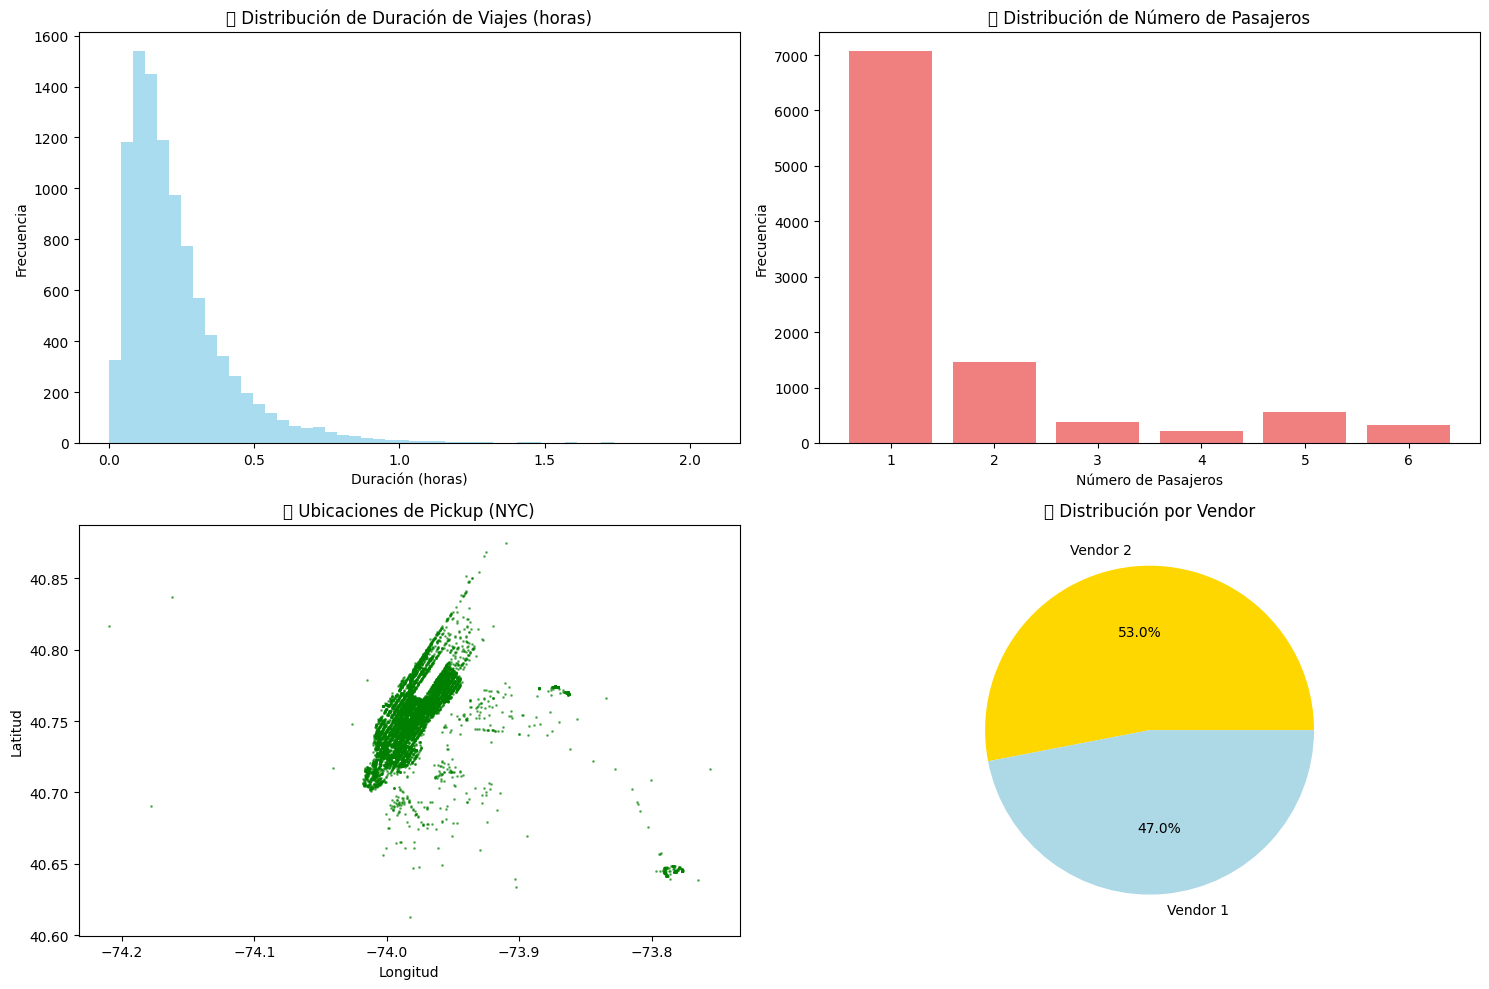

In [6]:
# 📈 Visualizaciones básicas
if df_sample is not None:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Distribución de duración de viajes
    if 'trip_duration' in df_sample.columns:
        duration_hours = df_sample['trip_duration'] / 3600
        # Filtrar outliers extremos para mejor visualización
        duration_filtered = duration_hours[duration_hours <= 3]  # Máximo 3 horas

        axes[0,0].hist(duration_filtered, bins=50, alpha=0.7, color='skyblue')
        axes[0,0].set_title('🕐 Distribución de Duración de Viajes (horas)')
        axes[0,0].set_xlabel('Duración (horas)')
        axes[0,0].set_ylabel('Frecuencia')

    # Número de pasajeros
    if 'passenger_count' in df_sample.columns:
        passenger_counts = df_sample['passenger_count'].value_counts().sort_index()
        axes[0,1].bar(passenger_counts.index, passenger_counts.values, color='lightcoral')
        axes[0,1].set_title('👥 Distribución de Número de Pasajeros')
        axes[0,1].set_xlabel('Número de Pasajeros')
        axes[0,1].set_ylabel('Frecuencia')

    # Mapa de calor de coordenadas (pickup)
    if all(col in df_sample.columns for col in ['pickup_longitude', 'pickup_latitude']):
        # Filtrar coordenadas válidas de NYC
        valid_coords = df_sample[
            (df_sample['pickup_longitude'] >= -74.3) &
            (df_sample['pickup_longitude'] <= -73.7) &
            (df_sample['pickup_latitude'] >= 40.5) &
            (df_sample['pickup_latitude'] <= 40.9)
        ]

        if len(valid_coords) > 0:
            axes[1,0].scatter(valid_coords['pickup_longitude'], valid_coords['pickup_latitude'],
                            alpha=0.5, s=1, color='green')
            axes[1,0].set_title('🗽 Ubicaciones de Pickup (NYC)')
            axes[1,0].set_xlabel('Longitud')
            axes[1,0].set_ylabel('Latitud')

    # Vendor distribution
    if 'vendor_id' in df_sample.columns:
        vendor_counts = df_sample['vendor_id'].value_counts()
        axes[1,1].pie(vendor_counts.values, labels=[f'Vendor {i}' for i in vendor_counts.index],
                     autopct='%1.1f%%', colors=['gold', 'lightblue'])
        axes[1,1].set_title('🚕 Distribución por Vendor')

    plt.tight_layout()
    plt.show()

## 🎯 **Paso 3: Feature Engineering Identificado**

Basándose en la exploración, estas serían las features que vamos a crear:

### 📍 **Features Geográficas:**
- `trip_distance` - Distancia euclidiana entre pickup y dropoff
- `trip_distance_manhattan` - Distancia Manhattan
- `pickup_cluster` - Cluster de zona de pickup
- `dropoff_cluster` - Cluster de zona de dropoff

### ⏰ **Features Temporales:**
- `pickup_hour` - Hora del día
- `pickup_day_of_week` - Día de la semana
- `pickup_month` - Mes
- `is_weekend` - Si es fin de semana
- `is_rush_hour` - Si es hora pico

### 🚕 **Features del Viaje:**
- `passenger_count` - Número de pasajeros (ya existe)
- `vendor_id` - ID del vendor (ya existe)
- `store_and_fwd_flag` - Flag de almacenamiento (ya existe)

In [7]:
# 🧮 Cálculo de feature básica: distancia
if df_sample is not None and all(col in df_sample.columns for col in coords_cols):

    def calculate_distance(df):
        """Calcular distancia euclidiana entre pickup y dropoff"""
        # Radio de la Tierra en km
        R = 6371

        # Convertir a radianes
        lat1 = np.radians(df['pickup_latitude'])
        lon1 = np.radians(df['pickup_longitude'])
        lat2 = np.radians(df['dropoff_latitude'])
        lon2 = np.radians(df['dropoff_longitude'])

        # Fórmula de Haversine
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
        c = 2 * np.arcsin(np.sqrt(a))
        distance = R * c

        return distance

    # Calcular distancia
    df_sample['trip_distance_km'] = calculate_distance(df_sample)

    print("🧮 **ANÁLISIS DE DISTANCIA:**")
    print(f"Distancia promedio: {df_sample['trip_distance_km'].mean():.2f} km")
    print(f"Distancia mediana: {df_sample['trip_distance_km'].median():.2f} km")
    print(f"Distancia máxima: {df_sample['trip_distance_km'].max():.2f} km")

    # Correlación entre distancia y duración
    if 'trip_duration' in df_sample.columns:
        correlation = df_sample['trip_distance_km'].corr(df_sample['trip_duration'])
        print(f"📊 Correlación distancia-duración: {correlation:.3f}")

🧮 **ANÁLISIS DE DISTANCIA:**
Distancia promedio: 3.41 km
Distancia mediana: 2.08 km
Distancia máxima: 45.12 km
📊 Correlación distancia-duración: 0.157


## 📋 **Resumen de Exploración**

### ✅ **Lo que hemos descubierto:**
1. **Dataset válido** - Estructura correcta para ML
2. **Features geográficas** - Coordenadas de NYC válidas
3. **Target variable** - `trip_duration` en segundos
4. **Outliers presentes** - Necesitamos limpieza
5. **Correlación distancia-duración** - Feature importante

### 🎯 **Próximos pasos (FASE 2):**
1. **Crear base de datos PostgreSQL en AWS**
2. **Migrar dataset completo**
3. **Implementar arquitectura hexagonal**
4. **Setup MLflow tracking**

### 🏗️ **Arquitectura definida:**
```
taxi_duration_predictor/
├── domain/
│   ├── entities.py      # TaxiTrip, Location, Prediction
│   ├── ports.py         # Interfaces/Puertos
│   └── services.py      # Business Logic
├── adapters/
│   ├── data_adapter.py  # PostgreSQL
│   ├── ml_adapter.py    # MLflow + Sklearn
│   └── api_adapter.py   # FastAPI
└── api/
    └── main.py          # FastAPI app
```

### 🚀 **¿Listo para la FASE 2?**